In [31]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# 1)

In [34]:
L = [1,5,10,11,50,100]

Fonction de masse = fonction qui donne la probabilité d'un résultat élémentaire d'une expérience --> différent d'une densité de probabilité, définie seulement pour des variables aléatoires absolument continue.

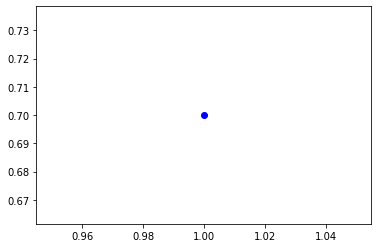

1
proba de prédiction correcte pour le modèle agrégé est 0.7 pour 1 classifieur(s)


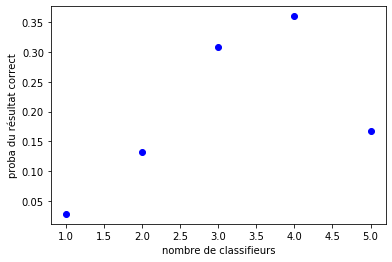

3
proba de prédiction correcte pour le modèle agrégé est 0.8369199999999997 pour 5 classifieur(s)


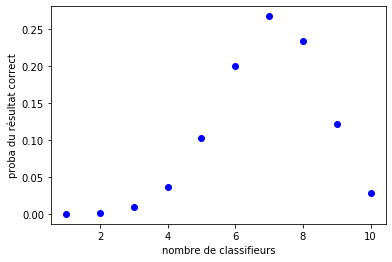

6
proba de prédiction correcte pour le modèle agrégé est 0.8497316674000002 pour 10 classifieur(s)


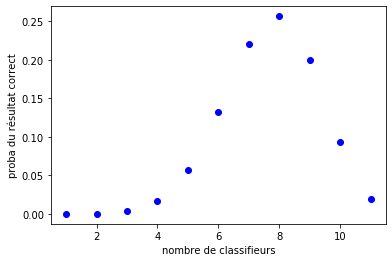

6
proba de prédiction correcte pour le modèle agrégé est 0.9217752090400003 pour 11 classifieur(s)


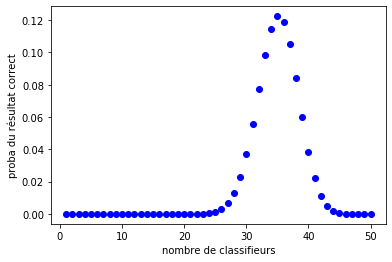

26
proba de prédiction correcte pour le modèle agrégé est 0.9976304521510121 pour 50 classifieur(s)


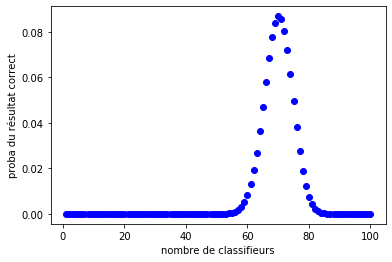

51
proba de prédiction correcte pour le modèle agrégé est 0.9999779390866489 pour 100 classifieur(s)


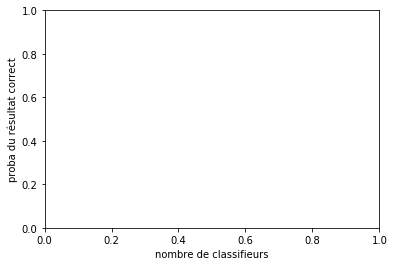

In [54]:
fig, ax = plt.subplots(1, 1)
p = 0.7
for n in L:
    x = np.arange(1,n+1)
    plt.plot(x, binom.pmf(x, n, p), 'bo',label='binom pmf')
    plt.show()
    plt.xlabel('nombre de classifieurs')
    plt.ylabel('proba du résultat correct')
    m = int(n/2)+1
    print(m)
    print("proba de prédiction correcte pour le modèle agrégé est {} pour {} classifieur(s)".format(sum([binom.pmf(x, n, p) for x in range(m,n+1)]), n))

On remarque que la probabilité d'être correct diminue avec le nombre de classifieurs. (?)<br>
La fonction de masse se décale vers la droite => la proba la plus grande est lorsque le nombre de classifieurs est élevé. (?)<br>
Lorsque l'on aggrège les proba avec des nombres différents de classifieurs, on obtient des résultats croissants. (?)

# Bagging

In [98]:
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1*(0.5-rng.rand(16))
X_test = np.arange(0.0,5.0,0.01)[:, np.newaxis]

In [96]:
print(X_test.shape)
print(X.shape)

(500, 1)
(80, 1)


#### Influence de la profondeur

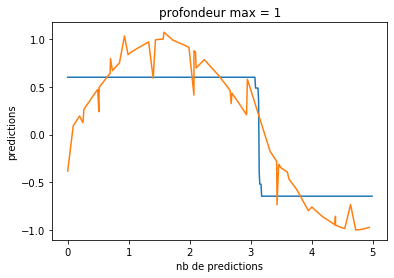

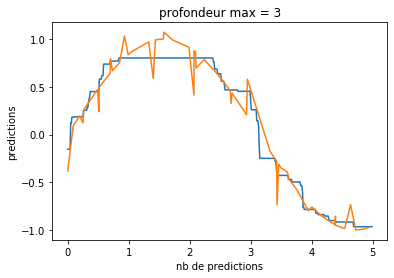

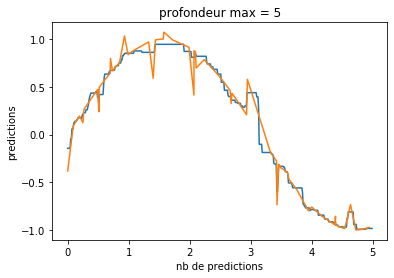

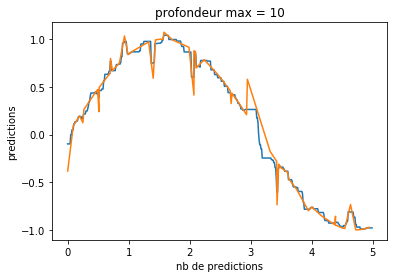

In [71]:
depth_list = [1,3,5,10]
# BaggingRegressor prend un nombre d'arbres de 10 par défaut
for depth in depth_list:
    br = BaggingRegressor(DecisionTreeRegressor(max_depth=depth))
    br.fit(X,y)
    plt.title('profondeur max = {}'.format(depth))
    plt.xlabel('nb de predictions')
    plt.ylabel('predictions')
    y_pred = br.predict(X_test)
    plt.plot(X_test, y_pred)
    plt.plot(X, y)
    plt.show()

On remarque que lorsque l'on augmente la profondeur des arbres (ici 10 par défaut), les prédictions reproduisent la réalité, de même pour le bruit.

#### Influence du nombre d'estimateurs

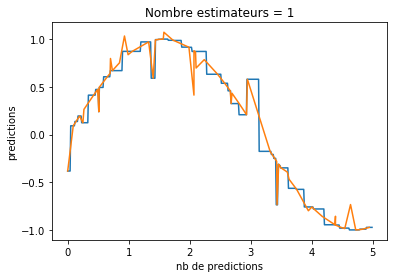

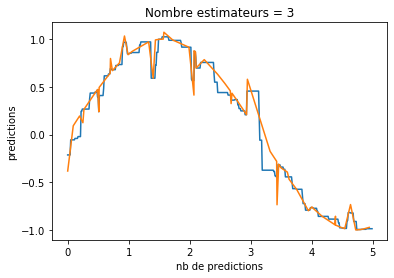

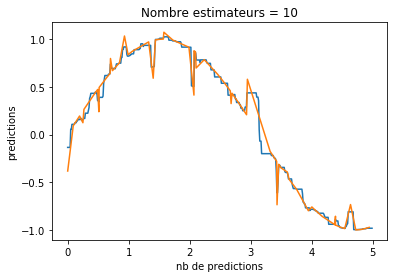

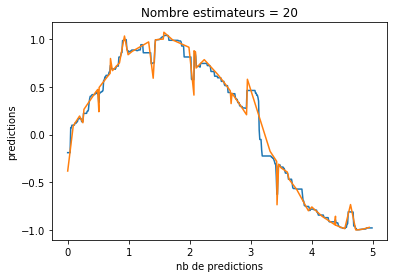

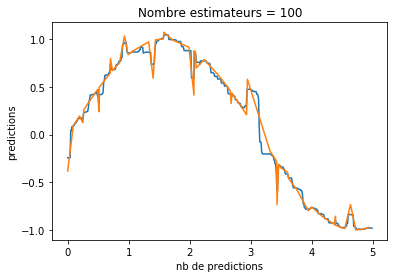

In [102]:
nb_estimators_list = [1,3,10,20,100]
for nb_est in nb_estimators_list:
    br = BaggingRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=nb_est)
    br.fit(X,y)
    plt.title('Nombre estimateurs = {}'.format(nb_est))
    plt.xlabel('nb de predictions')
    plt.ylabel('predictions')
    y_pred = br.predict(X_test)
    plt.plot(X_test, y_pred)
    plt.plot(X, y)
    plt.show()

La variance est réduite avec le bagging car on remarque que les prédictions collent davantage à la réalité. En revanche le biais augmente légèrement (pas assez pour compenser la diminution de la variance => le bagging a du sens).

L'idée générale est que considérer beaucoup de classifieurs mauvais peut être meilleur que considérer un seul bon classifieur.

#### Influence du bruit

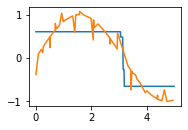

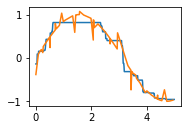

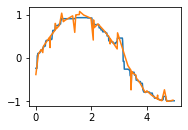

ValueError: num must be 1 <= num <= 4, not 5

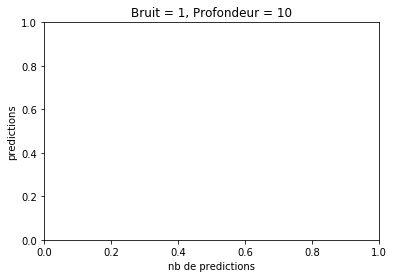

In [121]:
bruits_list = [1,2,10,50]
depth_list = [1,3,5,10]
dataSetNb = 1
for bruit in bruits_list:
    for depth in depth_list:
        rng = np.random.RandomState(1)
        X = np.sort(5*rng.rand(80,1), axis=0)
        y = np.sin(X).ravel()
        y[::5] += bruit*(0.5-rng.rand(16))
        X_test = np.arange(0.0,5.0,0.01)[:, np.newaxis]
        br = BaggingRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=10)
        br.fit(X,y)
        plt.title('Bruit = {}, Profondeur = {}'.format(bruit, depth))
        plt.xlabel('nb de predictions')
        plt.ylabel('predictions')
        y_pred = br.predict(X_test)
        plt.subplot(221+dataSetNb)
        plt.plot(X_test, y_pred)
        plt.plot(X, y)
        plt.show()
        dataSetNb+=1

On remarque que prendre une profondeur importante lorsqu'il y a beaucoup de bruit donne une courbe avec beaucoup de bruit (surrapprentissage). En fait, on peut considérer une forte complexité des estimateurs uniquement si on a des hypothèses sur les fonctions de départ. Ex: on veut approcher sinus, or sinus n'a pas de bruit donc on peut considérer un modèle complexe (il ne répliquera pas le bruit).

In [ ]:
bruits_list = [1,2,10,50]
depth_list = [1,3,5,10]
dataSetNb = 1
for bruit in bruits_list:
    for depth in depth_list:
        rng = np.random.RandomState(1)
        X = np.sort(5*rng.rand(80,1), axis=0)
        y = np.sin(X).ravel()
        y[::5] += bruit*(0.5-rng.rand(16))
        X_test = np.arange(0.0,5.0,0.01)[:, np.newaxis]
        br = BaggingRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=10)
        br.fit(X,y)
        plt.title('Bruit = {}, Profondeur = {}'.format(bruit, depth))
        plt.xlabel('nb de predictions')
        plt.ylabel('predictions')
        y_pred = br.predict(X_test)
        plt.plot(X_test, y_pred)
        plt.plot(X, y)
        plt.show()

# Random forests